In [1]:
import os
import random
import warnings
from IPython.display import display, HTML

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

from auto_categorical_features_transformer import create_categorical_feature_transformations_report, CategoricalTransformationMethods

In [2]:
warnings.filterwarnings("ignore")

In [3]:
def _load_music_genre_dataset():
    music_genre_dataset_df = pd.read_csv('./datasets/music_genre.csv')
    music_genre_dataset_df = music_genre_dataset_df[~music_genre_dataset_df['music_genre'].isna()].reset_index()
    genre_to_int_label_map = {genre: idx for idx, genre in enumerate(sorted(set(music_genre_dataset_df['music_genre'])))}
    y = music_genre_dataset_df['music_genre'].map(genre_to_int_label_map).astype(int)
    X = music_genre_dataset_df.drop(columns=['music_genre'])
    return X, y

In [4]:
X, y = _load_music_genre_dataset()

transformations evaluation: 100%|██████████████████████████████████████████████████████████████████████| 16/16 [02:18<00:00,  8.63s/it]


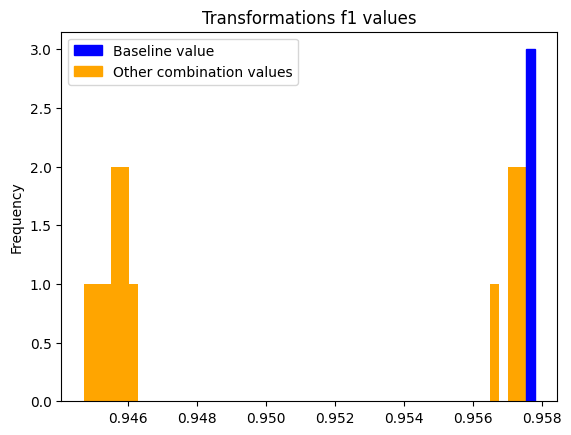

In [5]:
one_hot_results = create_categorical_feature_transformations_report(
    X, y,
    transformation_method=CategoricalTransformationMethods.OneHot,
    return_rich_table=True,
    verbose=True
)
one_hot_results.summary_table

In [6]:
# woe_results = create_categorical_feature_transformations_report(
#     X, y,
#     transformation_method=CategoricalTransformationMethods.WeightOfEvidence,
#     return_rich_table=True,
#     verbose=True
# )
# woe_results.summary_table

transformations evaluation: 100%|██████████████████████████████████████████████████████████████████████| 16/16 [01:56<00:00,  7.30s/it]


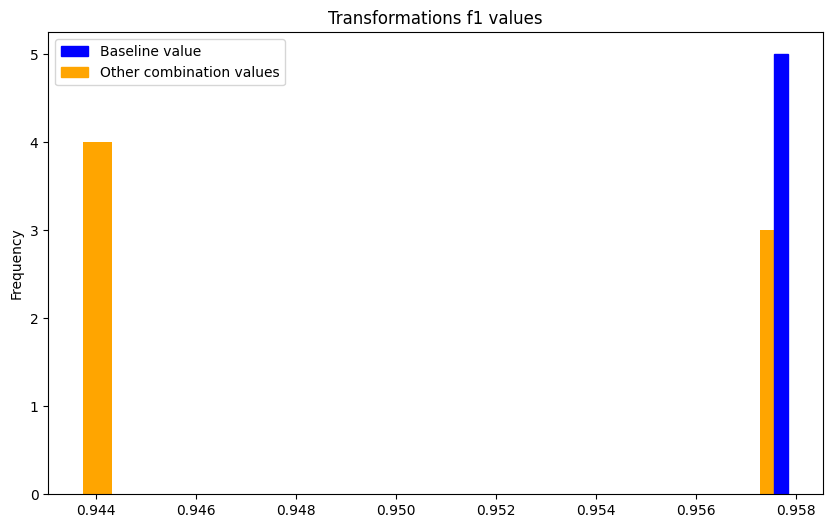

In [7]:
loo_results = create_categorical_feature_transformations_report(
    X, y,
    transformation_method=CategoricalTransformationMethods.LeaveOneOut,
    return_rich_table=True,
    verbose=True
)
loo_results.summary_table

In [8]:
loo_results

CategoricalTransformationResults(transformation_candidate_features=('mode', 'popularity', 'key', 'obtained_date'), baseline_evaluation_results=transformed_columns          []
f1                     0.957723
f1_std                 0.001439
accuracy                0.95774
accuracy_std           0.001449
Name: 0, dtype: object, summary_table=<datapane.client.api.report.blocks.DataTable object at 0x13211b850>)